<a href="https://colab.research.google.com/github/sebasruggero/TextAnalytics/blob/main/Milei_SpeechToText_Statics_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Border Data


## Lic. Sebastian Ruggero
#### Tema de Análisis: Speech to Text and Text Analytics




<h1>Este trabajo tiene como objetivo aplicar tecnicas de analisis estadisticos para realizar Text Analytics</h1>

### [Text Mining Infrastructure in R](https://www.researchgate.net/publication/26539008_Text_Mining_Infrastructure_in_R)

### [Using Text Mining Techniques for Extracting Information from Research Articles](https://www.researchgate.net/publication/321150349_Using_Text_Mining_Techniques_for_Extracting_Information_from_Research_Articles)

### [Text Mining: Approaches and Applications](https://www.researchgate.net/publication/265568331_Text_Mining_Approaches_and_Applications)

### [Text as Data](https://web.stanford.edu/~gentzkow/research/text-as-data.pdf)

Fuente de analisis : [Video - Entrevista realizada por Esteban Trebuc a Javier Milei - 8 ago 2023  ](https://www.youtube.com/watch?v=-FeSfqRIKxU&t=13s)


<h3>El algoritmo incluye los siguietes pasos:</h3>

### Preparacion del entorno para realizar el analisis utilizando lenguaje R

 1. Configuracion de libreria OpenaAi para realizar el analisis utilizando  [ChatGPT and Whisper APIs ](https://openai.com/blog/introducing-chatgpt-and-whisper-apis)

 2. Instalacion y carga de librerias restantes

 3. Conversion de audio a texto mediante el uso de la API

4. Carga de datos

5. Sentimientos: Analisis y Visualización

6. Limpieza de texto

  6.1 Conversión de texto a minusculas

  6.2  Eliminar palabras vacías

7. Nube de Palabras

8. Frecuencia de Palabras

9. Biagramas: Analisis y Visualizacion






 1. Configuracion de libreria OpenaAi para realizar el analisis utilizando  [ChatGPT and Whisper APIs ](https://openai.com/blog/introducing-chatgpt-and-whisper-apis)



In [ ]:
!pip install git+https://github.com/openai/whisper.git
!sudo apt update && sudo apt install ffmpeg
!pip install webvtt-py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 2. Instalacion y carga de librerias restantes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import webvtt
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
nltk.download('all')
nltk.download('punkt')
nltk.download('vader_lexicon')

 3. Conversion de audio a texto mediante el uso de la API


In [ ]:
!whisper "/content/drive/Othercomputers/My Laptop/DataScience/SpeechToText/milei_trebuc.mp3" --model small

4. Carga de datos desde el drive

In [ ]:
# Cargar archivo VTT
subtitulos = webvtt.read('/content/milei_trebuc.vtt')  # Reemplaza "ruta/archivo.vtt" con la ubicación y el nombre de tu archivo VTT

# Crear una lista de diccionarios para almacenar los datos de los subtítulos
data = []
for subtitulo in subtitulos:
    data.append({'time': subtitulo.start, 'subtitulo': subtitulo.text})

# Crear DataFrame
df = pd.DataFrame(data)

# Mostrar DataFrame
print(df)

             time                                          subtitulo
0    00:00:00.000                                          SILVACIÓN
1    00:00:08.640                                ¿Tás loco, mil ahí?
2    00:00:09.840                        ¿Qué haces, Javier querido?
3    00:00:10.680                               ¿Qué haces, Esteban?
4    00:00:11.400                                 Gracias por venir.
..            ...                                                ...
109  00:06:46.280  Y yo le contesté con una frase del libro de Ma...
110  00:06:49.280  que dice que el triunfo de la guerra no viene ...
111  00:06:54.280          sino de las fuerzas que vienen del cielo.
112  00:06:57.280  Pero cuando vos estás convencido, cuando vos e...
113  00:07:02.280  como lo estamos nosotros, nosotros fuimos y di...

[114 rows x 2 columns]


In [ ]:
df ['start_date'] = pd.to_datetime (df.time)

5. Sentimientos: Analisis y Visualización


In [ ]:
# Cargamos las librerias
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
sia = SentimentIntensityAnalyzer()
df['Puntaje_sentimiento'] = df['subtitulo'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [ ]:
import pandas as pd
import plotly.express as px


# Define una función para asignar colores según el tipo de sentimiento
def assign_color(puntaje):
    if puntaje > 0:
        return 'verde'  # Positivo - verde
    elif puntaje < 0:
        return 'rojo'  # Negativo - rojo
    else:
        return 'amarillo'  # Neutro - amarillo

# Agrega una nueva columna al DataFrame con el color según el tipo de sentimiento
df['Color_sentimiento'] = df['Puntaje_sentimiento'].apply(assign_color)

# Crea el gráfico de dispersión
fig = px.scatter(df, x='time', y='Puntaje_sentimiento', color='Color_sentimiento', text=None,
                 title='Análisis de Sentimiento a lo largo del tiempo')

# Ajusta el rango del eje x
fig.update_xaxes(range=[0, df['time'].max()])

# Formatea el eje x para mostrar el formato MM:SS
fig.update_layout(xaxis_tickformat='%M:%S')

# Personaliza la apariencia del gráfico
fig.update_traces(textposition='top center')

# Muestra el gráfico
fig.show()

In [ ]:
# Cargar archivo VTT
subtitulos = webvtt.read('/content/milei_trebuc.vtt')   # Reemplaza "ruta/archivo.vtt" con la ubicación y el nombre de tu archivo VTT

# Obtener texto plano sin los tiempos de los subtítulos
texto_plano = '\n'.join(subtitulo.text for subtitulo in subtitulos)

# Mostrar texto plano
print(texto_plano)

6. Limpieza de texto

  6.1 Conversión de texto a minusculas

  6.2  Eliminar palabras vacías



In [ ]:
# Pasamos el texto a minusculas
texto_minusculas = texto_plano.lower()

# Definimos las stopwords en el idioma correspondiente
stopwords_es = set(stopwords.words('spanish'))

# Eliminar palabras vacías
stopwords_es = stopwords.words('spanish')
palabras_a_eliminar = [",", "que", "y", "otras", "otras", "¿", "?", ".", "...", "si","vos", "entonces", "va", "ver", "digamos", "claro","tener","tenés"]

# Tokenización del texto
palabras = nltk.word_tokenize(texto_minusculas)

# Eliminacion de stopwords
texto_sin_stopwords = [palabra for palabra in palabras if palabra.lower() not in stopwords_es and palabra not in palabras_a_eliminar]



In [ ]:
texto_procesado = ' '. join(texto_sin_stopwords)

In [ ]:
texto_procesado

'silvación ¿tás loco mil ahí ¿qué haces javier querido ¿qué haces esteban gracias venir gracias favor ¿tás loco vi tipo ¿tipo tal loco ¿por ¿eh ¿por ¿qué vía cómoda relajada ¿tranquila ¿te empezáis respeto obvio momento sentís acorralan motivó ¿no gobierno arrancó política censura fuerte hacia liberales leandro santoro iba pasaba canales pidiendo censuraran liberales libertarios consideraba peligro así arrinconaron podés agachar cabeza dejar aplasten solución salida irme meterme barro política darle pelea ¿viste cómo dice golpe golpe ¿qué pensás país decidí quedarme dar pelea adentro fondo mirá vas partido argentina mirá colorío enchades lindo lindo cánticos verdaderamente fabulosos mirá podés gritar quiera luego hace messi calzarlo corto botines ponerte padear pueden hacer talento menos política reacciona pues fíjate últimos dos años corrimiento discurso veía hace menos 80 años parece tema menor hecho involucrarnos meternos dar batalla adentro hacer volar estatus cubo adentro sabés de

7. Nube de Palabras



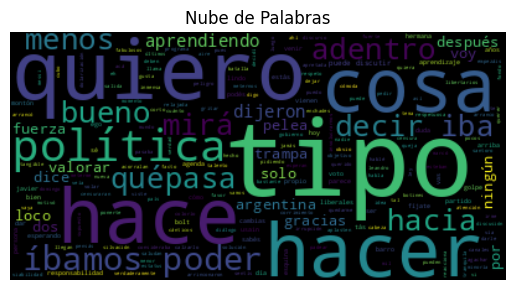

In [ ]:
wordcloud = WordCloud().generate(texto_procesado)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras')
plt.show()

In [ ]:
# Tokenización de palabras

from nltk.tokenize import word_tokenize
from nltk.text import Text

text = texto_procesado
tokens = word_tokenize(text.lower())

# Creación del objeto Text de NLTK
text_obj = Text(tokens)

# Análisis de concordancia
term = "Argentina"
concordance = text_obj.concordance_list(term, width=50)

# Imprimir concordancia
for entry in concordance:
    print(entry.line)
    print('')

do mirá vas partido argentina mirá colorío enchad

va agenda discusión argentina ningún tipo duda pu

ia poner pie vuelta argentina proceso mismo venir



9. Biagramas: Analisis y Visualizacion


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter

# Tokenización de palabras
text = texto_procesado

tokens = word_tokenize(text.lower())

# Creación de bigramas (pares de palabras)
bigrams = list(ngrams(tokens, 2))

# Conteo de co-ocurrencia de bigramas
co_ocurrence_counts = Counter(bigrams)

# Imprimir los bigramas más frecuentes
for bigram, count in co_ocurrence_counts.most_common(10):
    print(bigram, count)


In [ ]:
import plotly.express as px
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter

# Tu código para tokenización y conteo de bigramas aquí

# Crear un DataFrame a partir del contador de co-ocurrencia
data = {'Bigram': [' '.join(bigram) for bigram, _ in co_ocurrence_counts.most_common(10)],
        'Count': [count for _, count in co_ocurrence_counts.most_common(10)]}

df = pd.DataFrame(data)

# Graficar el diagrama de bigramas
fig = px.bar(df, x='Bigram', y='Count', title='Diagrama de Bigramas más Frecuentes')
fig.show()